# Strength of radial migration in multi-zone models

In [1]:
import math as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vice

from multizone_stars import MultizoneStars
import paths
from utils import box_smooth, get_bin_centers, get_color_list

In [5]:
mzs010 = MultizoneStars.from_output('gaussian_weak_cbrt/diskmodel')
mzs027 = MultizoneStars.from_output('fiducial/diskmodel')
mzs036 = MultizoneStars.from_output('frankel2018/diskmodel')
mzs050 = MultizoneStars.from_output('gaussian_strong_cbrt/diskmodel')
mzs100 = MultizoneStars.from_output('gaussian_verystrong_cbrt/diskmodel')

In [ ]:
mwm_good = pd.read_csv(paths.data / 'MWM' / 'MWM_good.csv')
mwm_good

/var/folders/_s/lknhlnjn1g1cj388brpgztf80000gn/T/ipykernel_66067/1042251329.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  mwm_good = pd.read_csv(paths.data / 'MWM' / 'mwm_good.csv')


,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,raw_e_ti_2_h,raw_v_h,raw_e_v_h,galr,galphi,galz,o_fe,e_o_fe,mg_fe,e_mg_fe
0,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,NaN,tic_v8,25,27021597850714872,...,NaN,-0.639540,0.002446,12.439019,153.313414,-0.663968,0.010192,0.039634,0.068405,0.023022
1,54381405,NaN,421506067509558016,421506067510359808,369831290,16384,NaN,tic_v8,25,27021597850724078,...,NaN,-0.535050,0.000836,10.274266,162.308315,-0.351110,0.005226,0.034283,0.059586,0.018110
2,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,NaN,gaia_dr3_source,31,63050394783222145,...,NaN,-0.578460,0.000268,9.110510,170.227131,-0.163923,0.014934,0.030651,0.084750,0.015027
3,54381968,2M00220667+5639444,421558740986710784,421558740986710784,403316795,16025,NaN,gaia_dr3_source,31,63050394783222492,...,NaN,-0.574620,0.001790,10.491737,161.566806,-0.371339,0.031381,0.037164,0.089638,0.020740
4,54381984,2M00223542+5645497,421560390254274304,421560390254274304,403393131,16025,NaN,gaia_dr3_source,31,63050394783223054,...,NaN,-0.149020,0.000279,9.240553,169.234286,-0.180125,-0.016666,0.030693,0.021995,0.015061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375130,129060942,2M16450686-4436133,5943321249674150016,5943321249674150016,235739910,167421,NaN,gaia_dr3_source,31,63050396233472976,...,NaN,-0.270260,0.002284,3.859335,-154.467004,0.066365,0.035599,0.039470,0.089609,0.022875
375131,129060948,2M17435180-3145129,4054341276522790400,4054341276522790400,109258182,150138,NaN,gaia_dr3_source,31,63050395280560445,...,NaN,-0.207480,0.000762,2.294661,-173.358819,-0.111477,0.021868,0.033205,0.069364,0.017182
375132,129060949,2M17064804-4130129,-1,-1,378572051,163437,NaN,tic_v8,31,63050400623762993,...,NaN,0.083317,0.002082,NaN,NaN,NaN,-0.001412,0.038558,0.051635,0.022040
375133,129060952,2M18421778-0221529,4259525775644558592,4259525775644558592,182147492,102031,NaN,gaia_dr3_source,31,63050395619507304,...,NaN,-0.182360,0.001261,4.137974,106.938244,0.135773,0.000267,0.035093,0.019012,0.018856


In [22]:
mwm_local = mwm_good[
    (mwm_good['galr'] >= 7) &
    (mwm_good['galr'] < 9) &
    (mwm_good['galz'].abs() <= 0.5)
].copy()
mwm_local

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,raw_e_ti_2_h,raw_v_h,raw_e_v_h,galr,galphi,galz,o_fe,e_o_fe,mg_fe,e_mg_fe
18,54382295,NaN,421589183715747968,421589183715747968,327577724,16024,NaN,tic_v8,25,27021597850733418,...,NaN,0.093438,0.005700,8.960581,171.306019,-0.140909,0.069631,0.059219,0.138467,0.041993
25,54382700,2M00200721+5700122,421625909974353280,421625914277199872,406762101,15668,NaN,gaia_dr3_source,31,63050394783245110,...,NaN,-0.392900,0.000658,8.711216,173.559819,-0.087171,-0.047315,0.032509,0.049804,0.016607
37,54383125,2M00304259+5618336,421662507395658112,421662507395658112,320281246,16387,NaN,gaia_dr3_source,31,63050394783257972,...,NaN,0.160290,0.000983,8.446911,176.385608,-0.047911,-0.094106,0.034655,0.083192,0.018495
59,54383757,2M00290801+5640111,421706109904337024,421706109904337024,320047050,16027,NaN,gaia_dr3_source,31,63050394783273185,...,NaN,-0.030770,0.000341,8.849934,172.602995,-0.117191,-0.030579,0.030951,0.033667,0.015279
69,54384398,NaN,421754728934768384,421754728934768384,354602465,16026,NaN,tic_v8,25,27021599488988855,...,NaN,-1.071500,0.001901,8.177484,179.313377,0.009705,-0.264763,0.037122,-0.024673,0.020435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375087,129060775,2M10494643-5955179,5338303745180789248,5338303745180789248,924696412,183470,NaN,gaia_dr3_source,31,63050395890465922,...,NaN,-0.995650,0.000882,7.761547,-155.442815,-0.015642,0.017357,0.033834,0.131872,0.017789
375088,129060777,2M09120875-4832413,5326054081799907712,5326054081799907712,372916511,171914,NaN,gaia_dr3_source,31,63050395875989157,...,NaN,-0.267180,0.002113,8.880072,-155.981804,0.012429,0.158641,0.042083,0.101920,0.025443
375112,129060864,2M09093978-4751104,5326886175877017088,5326886175877017088,74380758,171016,NaN,gaia_dr3_source,31,63050395876148699,...,NaN,-0.282060,0.002723,8.763567,-158.548094,0.023036,-0.065174,0.042139,0.074797,0.025557
375114,129060878,2M11484212-6220219,5334808943135705600,5334808943135705600,324668848,185355,NaN,gaia_dr3_source,31,63050395882762275,...,NaN,-0.545330,0.002316,7.492782,-141.850596,-0.016213,-0.039509,0.038696,0.015691,0.022182


In [4]:
mwm_starflow = pd.read_csv(paths.data / 'MWM' / 'MWM_starflow_good.csv')
mwm_starflow

/var/folders/_s/lknhlnjn1g1cj388brpgztf80000gn/T/ipykernel_66067/3966632274.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  mwm_starflow = pd.read_csv(paths.data / 'MWM' / 'MWM_starflow_good.csv')


,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,NaN,tic_v8,25,27021597850714872,...,54381291,NaN,4.180361,6.088176,2.244489,0.026994,0.140749,-0.131074,4.676188e+09,2
1,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,NaN,gaia_dr3_source,31,63050394783222145,...,54381959,2M00224114+5636475,3.083083,4.694695,1.429429,0.113474,0.211990,-0.014153,5.873784e+09,2
2,54381968,2M00220667+5639444,421558740986710784,421558740986710784,403316795,16025,NaN,gaia_dr3_source,31,63050394783222492,...,54381968,2M00220667+5639444,3.377377,4.862863,1.821822,0.138856,0.195661,0.071277,3.291247e+10,2
3,54381984,2M00223542+5645497,421560390254274304,421560390254274304,403393131,16025,NaN,gaia_dr3_source,31,63050394783223054,...,54381984,2M00223542+5645497,3.069069,4.750751,1.275275,0.031874,0.117477,-0.077964,8.887005e+09,2
4,54382000,2M00220711+5648323,421561489765700224,421561489765700224,403317093,16025,NaN,gaia_dr3_source,31,63050394783223394,...,54382000,2M00220711+5648323,4.036036,5.787788,2.242242,0.064578,0.142633,-0.033459,1.659244e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166517,129060909,2M13582184-6202236,5866253799616922112,5866253799616922112,325588166,185382,NaN,gaia_dr3_source,31,63050396108514375,...,129060909,2M13582184-6202236,1.695696,2.592593,0.826827,0.315579,0.379994,0.241419,1.396342e+10,2
166518,129060916,2M18513241-0027496,4266101851597309824,4266101851597309824,1781764882,99474,NaN,gaia_dr3_source,31,63050395632288218,...,129060916,2M18513241-0027496,6.138138,8.254254,4.008008,-0.044888,0.046192,-0.164074,6.301218e+09,2
166519,129060928,2M18243818-1635046,4096998479419908352,4096998479419908352,333258955,126601,NaN,gaia_dr3_source,31,63050395404576784,...,129060928,2M18243818-1635046,5.078156,6.873747,3.366733,0.117477,0.168187,0.060054,2.347997e+10,2
166520,129060933,AP17170016-2924116,4107328146305567488,4107328146305567488,80356057,146544,NaN,gaia_dr3_source,31,63050395433200649,...,129060933,AP17170016-2924116,4.176176,6.124124,2.228228,0.066822,0.157419,-0.050718,4.359177e+09,2


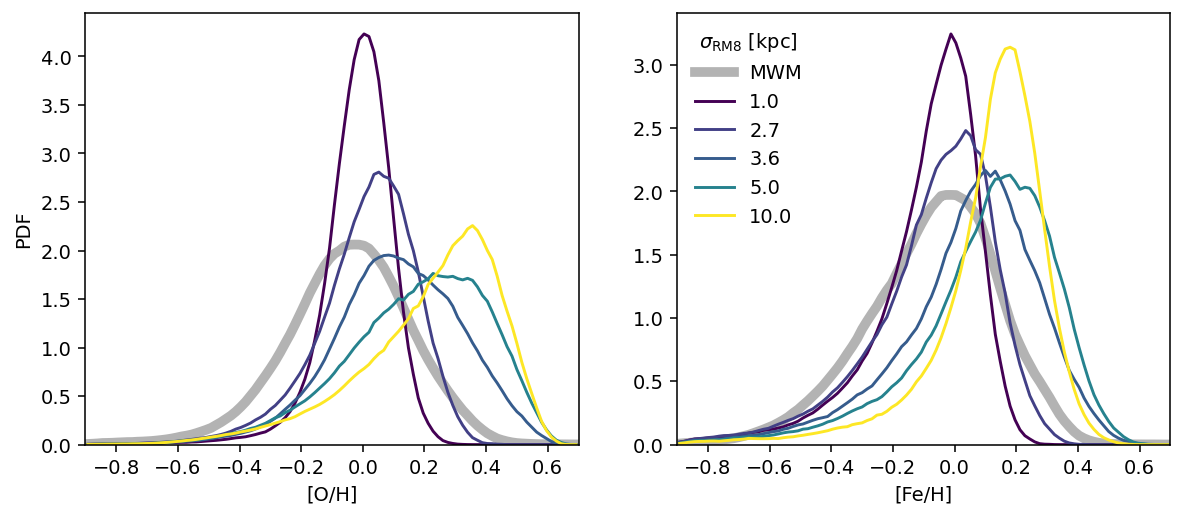

In [43]:
nbins = 100
xlim = (-0.9, 0.7)
smoothing = 0.1

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140)

# plot local MWM MDF
for i, col in enumerate(['o_h', ['fe_h']]):
    mdf, bin_edges = np.histogram(
        mwm_local[col], bins=nbins, range=xlim, density=True
    )
    mdf = box_smooth(mdf, bin_edges, smoothing)
    axs[i].plot(
        get_bin_centers(bin_edges), mdf, 
        color='0.7', linewidth=5, #alpha=0.6,
        label='MWM'
    )

# plot multizone predictions
models = [mzs010, mzs027, mzs036, mzs050, mzs100]
sigrm8 = [1., 2.7, 3.6, 5., 10.]
# Get list of line colors
colors = get_color_list(plt.get_cmap('viridis'), sigrm8 + [20])
for j, model in enumerate(models):
    subset = model.region(galr_lim=(7, 9), absz_lim=(0, 0.5))
    # Plot normalized MDFs
    for i, col in enumerate(['[o/h]', '[fe/h]']):
        mdf, bin_edges = subset.mdf(col, range=xlim, bins=nbins, 
                                    smoothing=smoothing, density=True)
        axs[i].plot(get_bin_centers(bin_edges), mdf, color=colors[j], label=sigrm8[j])

axs[0].set_xlim(xlim)
axs[1].set_xlim(xlim)
axs[0].set_ylim((0, None))
axs[1].set_ylim((0, None))

axs[0].set_xlabel('[O/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('PDF')

axs[1].legend(frameon=False, title=r'$\sigma_{\rm RM8}$ [kpc]')

plt.show()

- Try "sudden" migration within 1 Gyr of birth

## Analytic approximation

0.99679352656858
1.1500623553388143


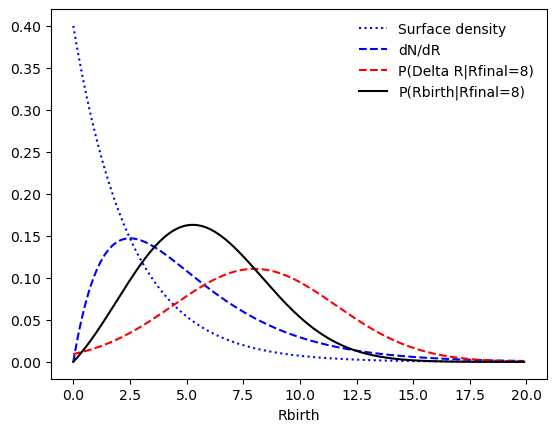

In [112]:
Rfinal = 8.
sigmaRM = 3.6
gradOH = -0.06
Rsun = 8.
Rdisk = 2.5

# OHarr = np.arange(-1, 1.1, 0.1)
Rbirth = np.arange(0, 20, 0.1)

# density profile
surface_density = Rdisk**-1 * np.exp(-Rbirth / Rdisk)
dNdR = Rbirth * Rdisk**-2 * np.exp(-Rbirth / Rdisk)
print(np.sum(dNdR) * 0.1)

# Migration probability
migr = (2*np.pi*sigmaRM**2)**-0.5 * np.exp(-(Rbirth - Rfinal)**2 / (2*sigmaRM**2))

const = np.exp(Rfinal / Rdisk - Rfinal**2 / (2*sigmaRM**2)) / (Rfinal * np.sqrt(2*np.pi*sigmaRM**2))
# Rbirth = OHarr / gradOH + Rsun
dN_dRbirth = const * Rbirth * np.exp(Rbirth * (Rfinal/sigmaRM**2 - 1/Rdisk)) * np.exp(-Rbirth**2 / (2*sigmaRM**2))
print(np.sum(dN_dRbirth) * 0.1)

fig, ax = plt.subplots()
ax.plot(Rbirth, surface_density, 'b:', label='Surface density')
ax.plot(Rbirth, dNdR, 'b--', label='dN/dR')
ax.plot(Rbirth, migr, 'r--', label='P(Delta R|Rfinal=8)')
ax.plot(Rbirth, dN_dRbirth, 'k-', label='P(Rbirth|Rfinal=8)')
ax.set_xlabel('Rbirth')
ax.legend(frameon=False)
plt.show()

1.1492568914740877


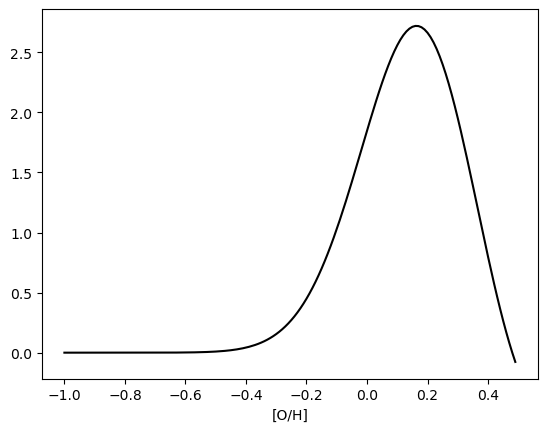

In [115]:
OHarr = np.arange(-1, 0.5, 0.01)
Rbirth = OHarr / gradOH + Rsun

dN_dOH = const / -gradOH * Rbirth * np.exp(Rbirth * (Rfinal/sigmaRM**2 - 1/Rdisk)) * np.exp(-Rbirth**2 / (2*sigmaRM**2))

print(np.sum(dN_dOH) * 0.01)

fig, ax = plt.subplots()
ax.plot(OHarr, dN_dOH, 'k-')
ax.set_xlabel('[O/H]')
plt.show()

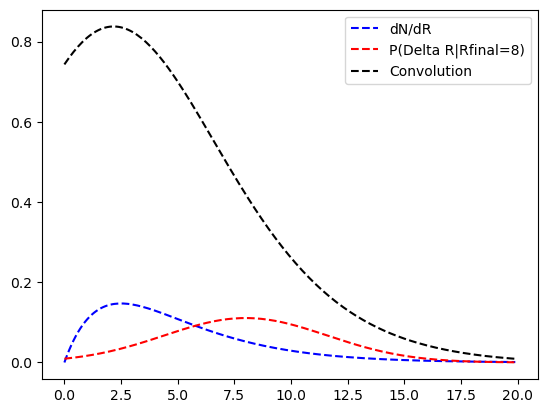

In [100]:
conv = np.exp(sigmaRM**2/(2*Rdisk**2)) * Rdisk**-2 * (Rbirth - sigmaRM**2/Rdisk) * np.exp(-Rbirth/Rdisk)

# deltaR_arr = np.arange(-20, 20, 0.1)
# migr = (2*np.pi*sigmaRM**2)**-0.5 * np.exp(-(Rbirth - Rfinal)**2 / (2*sigmaRM**2))

fig, ax = plt.subplots()
# ax.plot(Rbirth, conv, 'k-')
ax.plot(Rbirth, dNdR, 'b--', label='dN/dR')
ax.plot(Rbirth, migr, 'r--', label='P(Delta R|Rfinal=8)')
ax.plot(Rbirth, np.convolve(migr, dNdR, mode='same'), 'k--', label='Convolution')
ax.legend()
plt.show()
